### Importing required packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
%matplotlib inline

### Importing the dataset

In [2]:
wine = pd.read_csv('winequality-red.csv')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Checking if there are any null values

In [3]:
wine.info()
wine.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There are no null values

### Data Analysis

(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <a list of 10 Patch objects>)

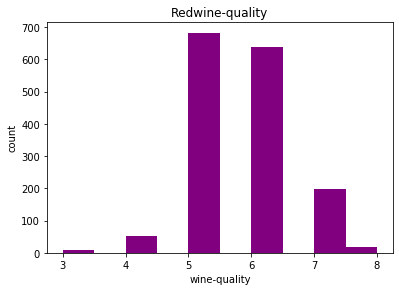

In [4]:
# Lets analyze the quality of the red-wine
fig = plt.figure()
axes = fig.add_axes([0.5,0.1,0.8,0.8])
axes.set_title('Redwine-quality')
axes.set_xlabel('wine-quality')
axes.set_ylabel('count')
axes.hist(wine['quality'],color='purple')

In [5]:
wine['pH'].unique()

array([3.51, 3.2 , 3.26, 3.16, 3.3 , 3.39, 3.36, 3.35, 3.28, 3.58, 3.17,
       3.11, 3.38, 3.04, 3.52, 3.43, 3.34, 3.47, 3.46, 3.45, 3.4 , 3.42,
       3.23, 3.5 , 3.33, 3.21, 3.48, 3.9 , 3.25, 3.32, 3.15, 3.41, 3.44,
       3.31, 3.54, 3.13, 2.93, 3.14, 3.75, 3.85, 3.29, 3.08, 3.37, 3.19,
       3.07, 3.49, 3.53, 3.24, 3.63, 3.22, 3.68, 2.74, 3.59, 3.  , 3.12,
       3.57, 3.61, 3.06, 3.6 , 3.69, 3.1 , 3.05, 3.67, 3.27, 3.18, 3.02,
       3.55, 2.99, 3.01, 3.56, 3.03, 3.62, 2.88, 2.95, 2.98, 3.09, 2.86,
       3.74, 2.92, 3.72, 2.87, 2.89, 2.94, 3.66, 3.71, 3.78, 3.7 , 4.01,
       2.9 ])

(array([403., 203., 316., 205., 262., 132.,  62.,  15.,   0.,   1.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

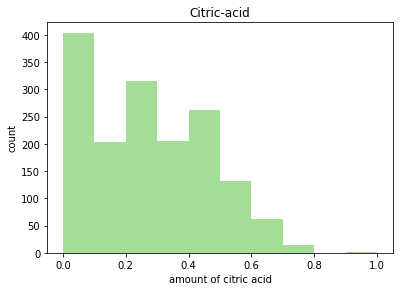

In [6]:
#Let's analyze how many of them have citricacid and how much percentage they have

fig = plt.figure()
axes = fig.add_axes([0.5,0.1,0.8,0.8])
axes.set_title('Citric-acid')
axes.set_xlabel('amount of citric acid')
axes.set_ylabel('count')
axes.hist(wine['citric acid'],color='#a2de96',bins=10)

(array([730., 471., 221., 113.,  52.,  10.,   0.,   0.,   0.,   2.]),
 array([  6. ,  34.3,  62.6,  90.9, 119.2, 147.5, 175.8, 204.1, 232.4,
        260.7, 289. ]),
 <a list of 10 Patch objects>)

<Figure size 432x288 with 0 Axes>

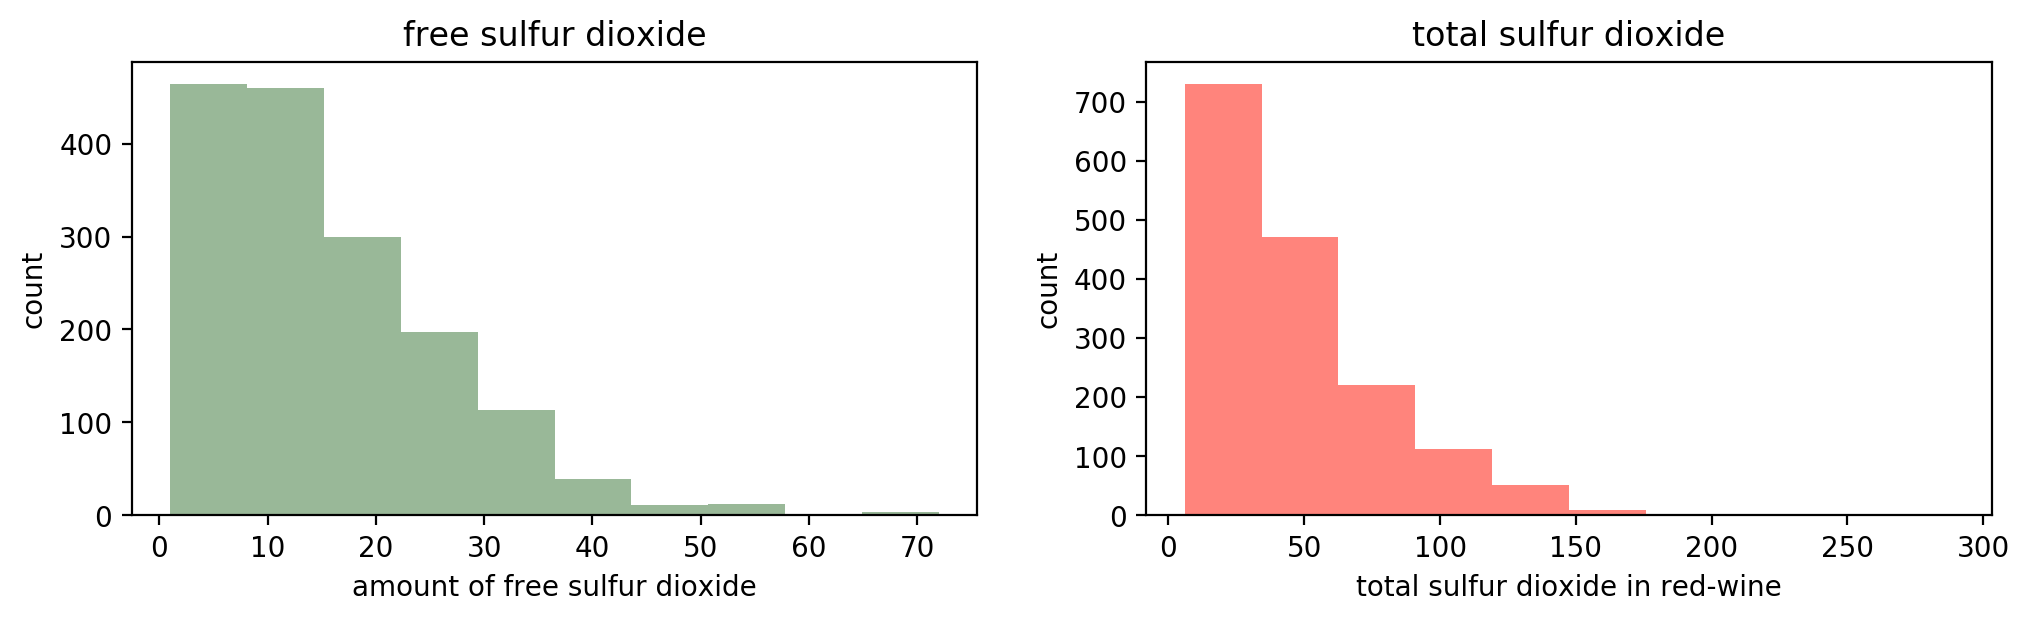

In [7]:
fig = plt.figure()
fig,axes = plt.subplots(1,2,figsize=(12,3),dpi=200)
axes[0].set_title('free sulfur dioxide')
axes[0].set_xlabel('amount of free sulfur dioxide')
axes[0].set_ylabel('count')
axes[0].hist(wine['free sulfur dioxide'],color='#99b898')
axes[1].set_title('total sulfur dioxide')
axes[1].set_xlabel('total sulfur dioxide in red-wine')
axes[1].set_ylabel('count')
axes[1].hist(wine['total sulfur dioxide'],color='#ff847c')

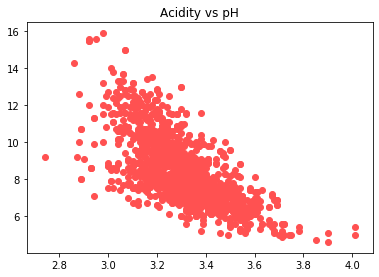

In [8]:
# Let's check how pH depends on fixed acidity
fig = plt.figure()
axes = fig.add_axes([0.1,0.1,0.8,0.8])
axes.set_title('Acidity vs pH')
axes.scatter(wine['pH'],wine['fixed acidity'],color='#ff5151')

<Figure size 432x288 with 0 Axes>

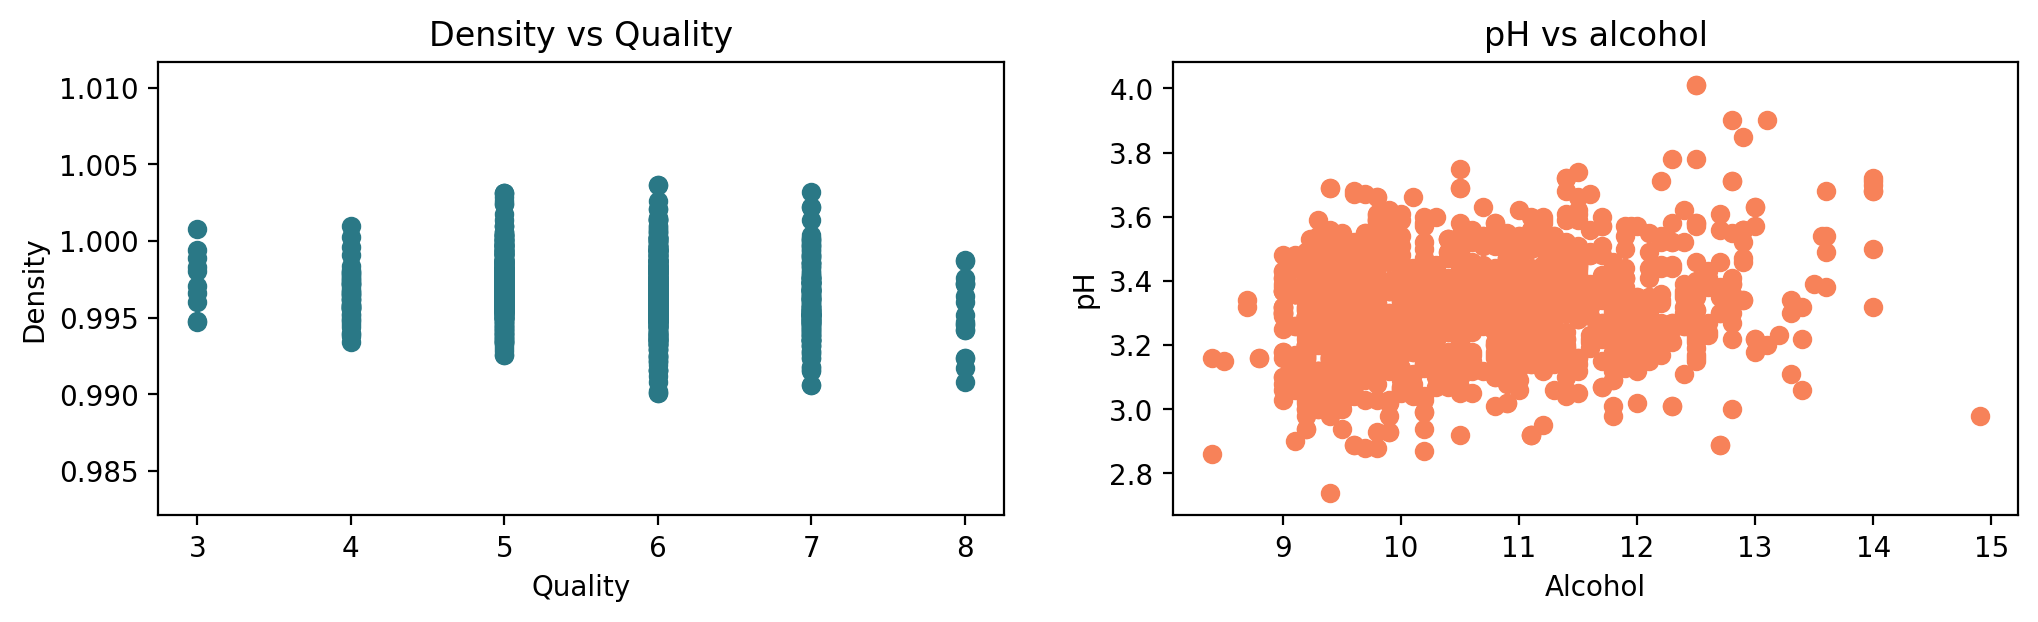

In [9]:
# Let's see how quality depends on density and pH depend on alcohol level
fig = plt.figure()
fig,axes = plt.subplots(1,2,figsize=(12,3),dpi=200)
axes[0].set_title('Density vs Quality')
axes[0].set_xlabel('Quality')
axes[0].set_ylabel('Density')
axes[0].scatter(wine['quality'],wine['density'],color='#2a7886')
axes[1].set_title('pH vs alcohol')
axes[1].set_xlabel('Alcohol')
axes[1].set_ylabel('pH')
axes[1].scatter(wine['alcohol'],wine['pH'],color='#f78259')

(array([ 37., 515., 323., 257., 232., 119.,  87.,  21.,   7.,   1.]),
 array([ 8.4 ,  9.05,  9.7 , 10.35, 11.  , 11.65, 12.3 , 12.95, 13.6 ,
        14.25, 14.9 ]),
 <a list of 10 Patch objects>)

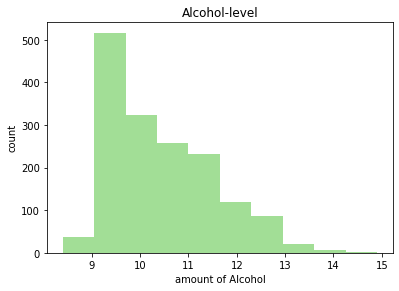

In [10]:
fig = plt.figure()
axes = fig.add_axes([0.5,0.1,0.8,0.8])
axes.set_title('Alcohol-level')
axes.set_xlabel('amount of Alcohol')
axes.set_ylabel('count')
axes.hist(wine['alcohol'],color='#a2de96',bins=10)

<Figure size 432x288 with 0 Axes>

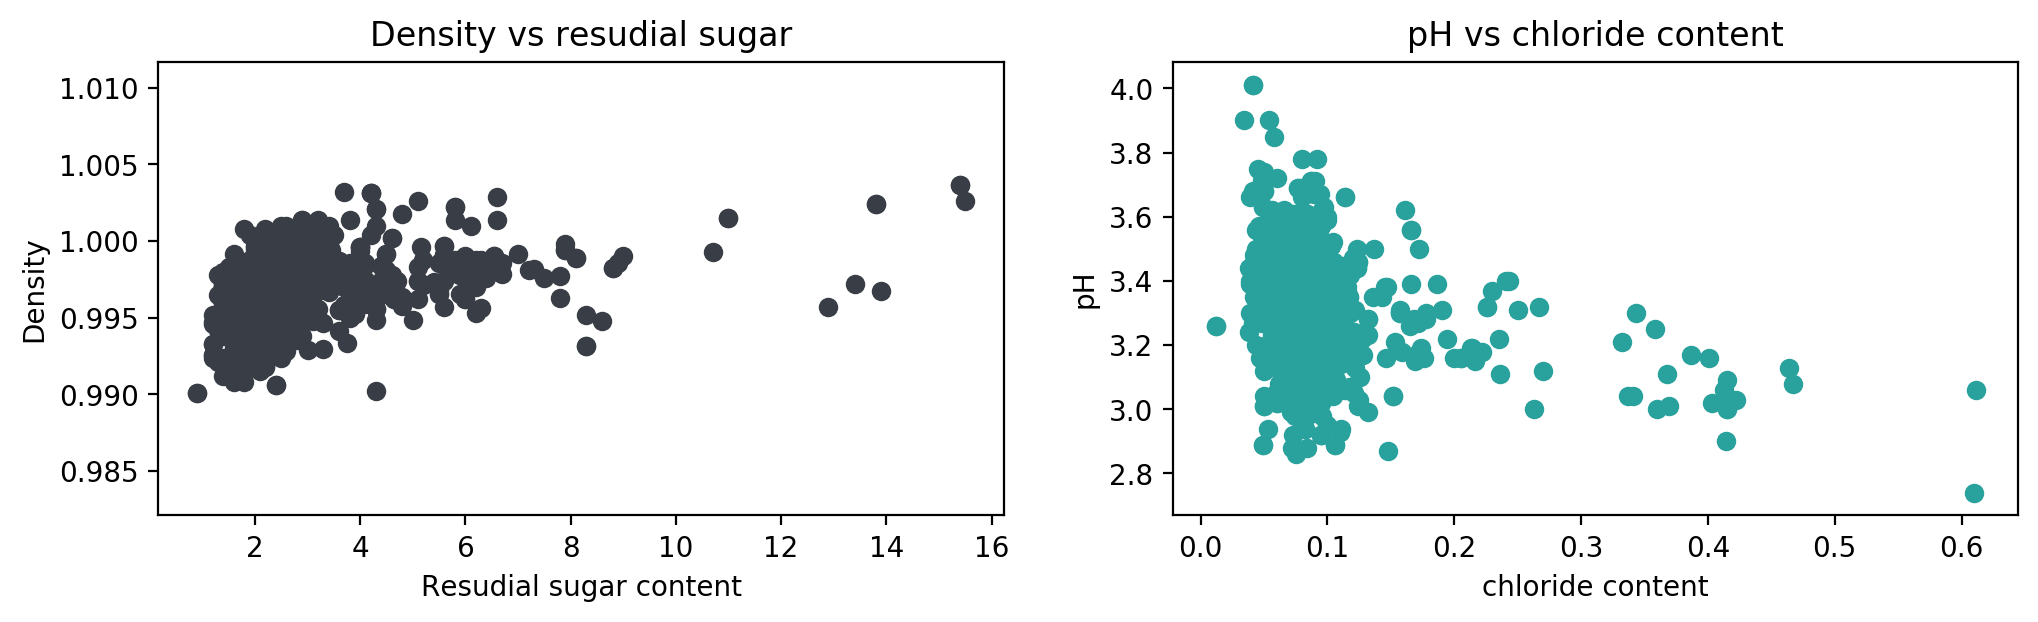

In [11]:
# Let's see how resudial sugar depends on density and pH depend on chloride content
fig = plt.figure()
fig,axes = plt.subplots(1,2,figsize=(12,3),dpi=200)
axes[0].set_title('Density vs resudial sugar')
axes[0].set_xlabel('Resudial sugar content')
axes[0].set_ylabel('Density')
axes[0].scatter(wine['residual sugar'],wine['density'],color='#393e46')
axes[1].set_title('pH vs chloride content')
axes[1].set_xlabel('chloride content')
axes[1].set_ylabel('pH')
axes[1].scatter(wine['chlorides'],wine['pH'],color='#29a19c')


### Let's plot some Boxplots 

In [12]:
wine.iloc[0,0]

7.4

<Figure size 432x288 with 0 Axes>

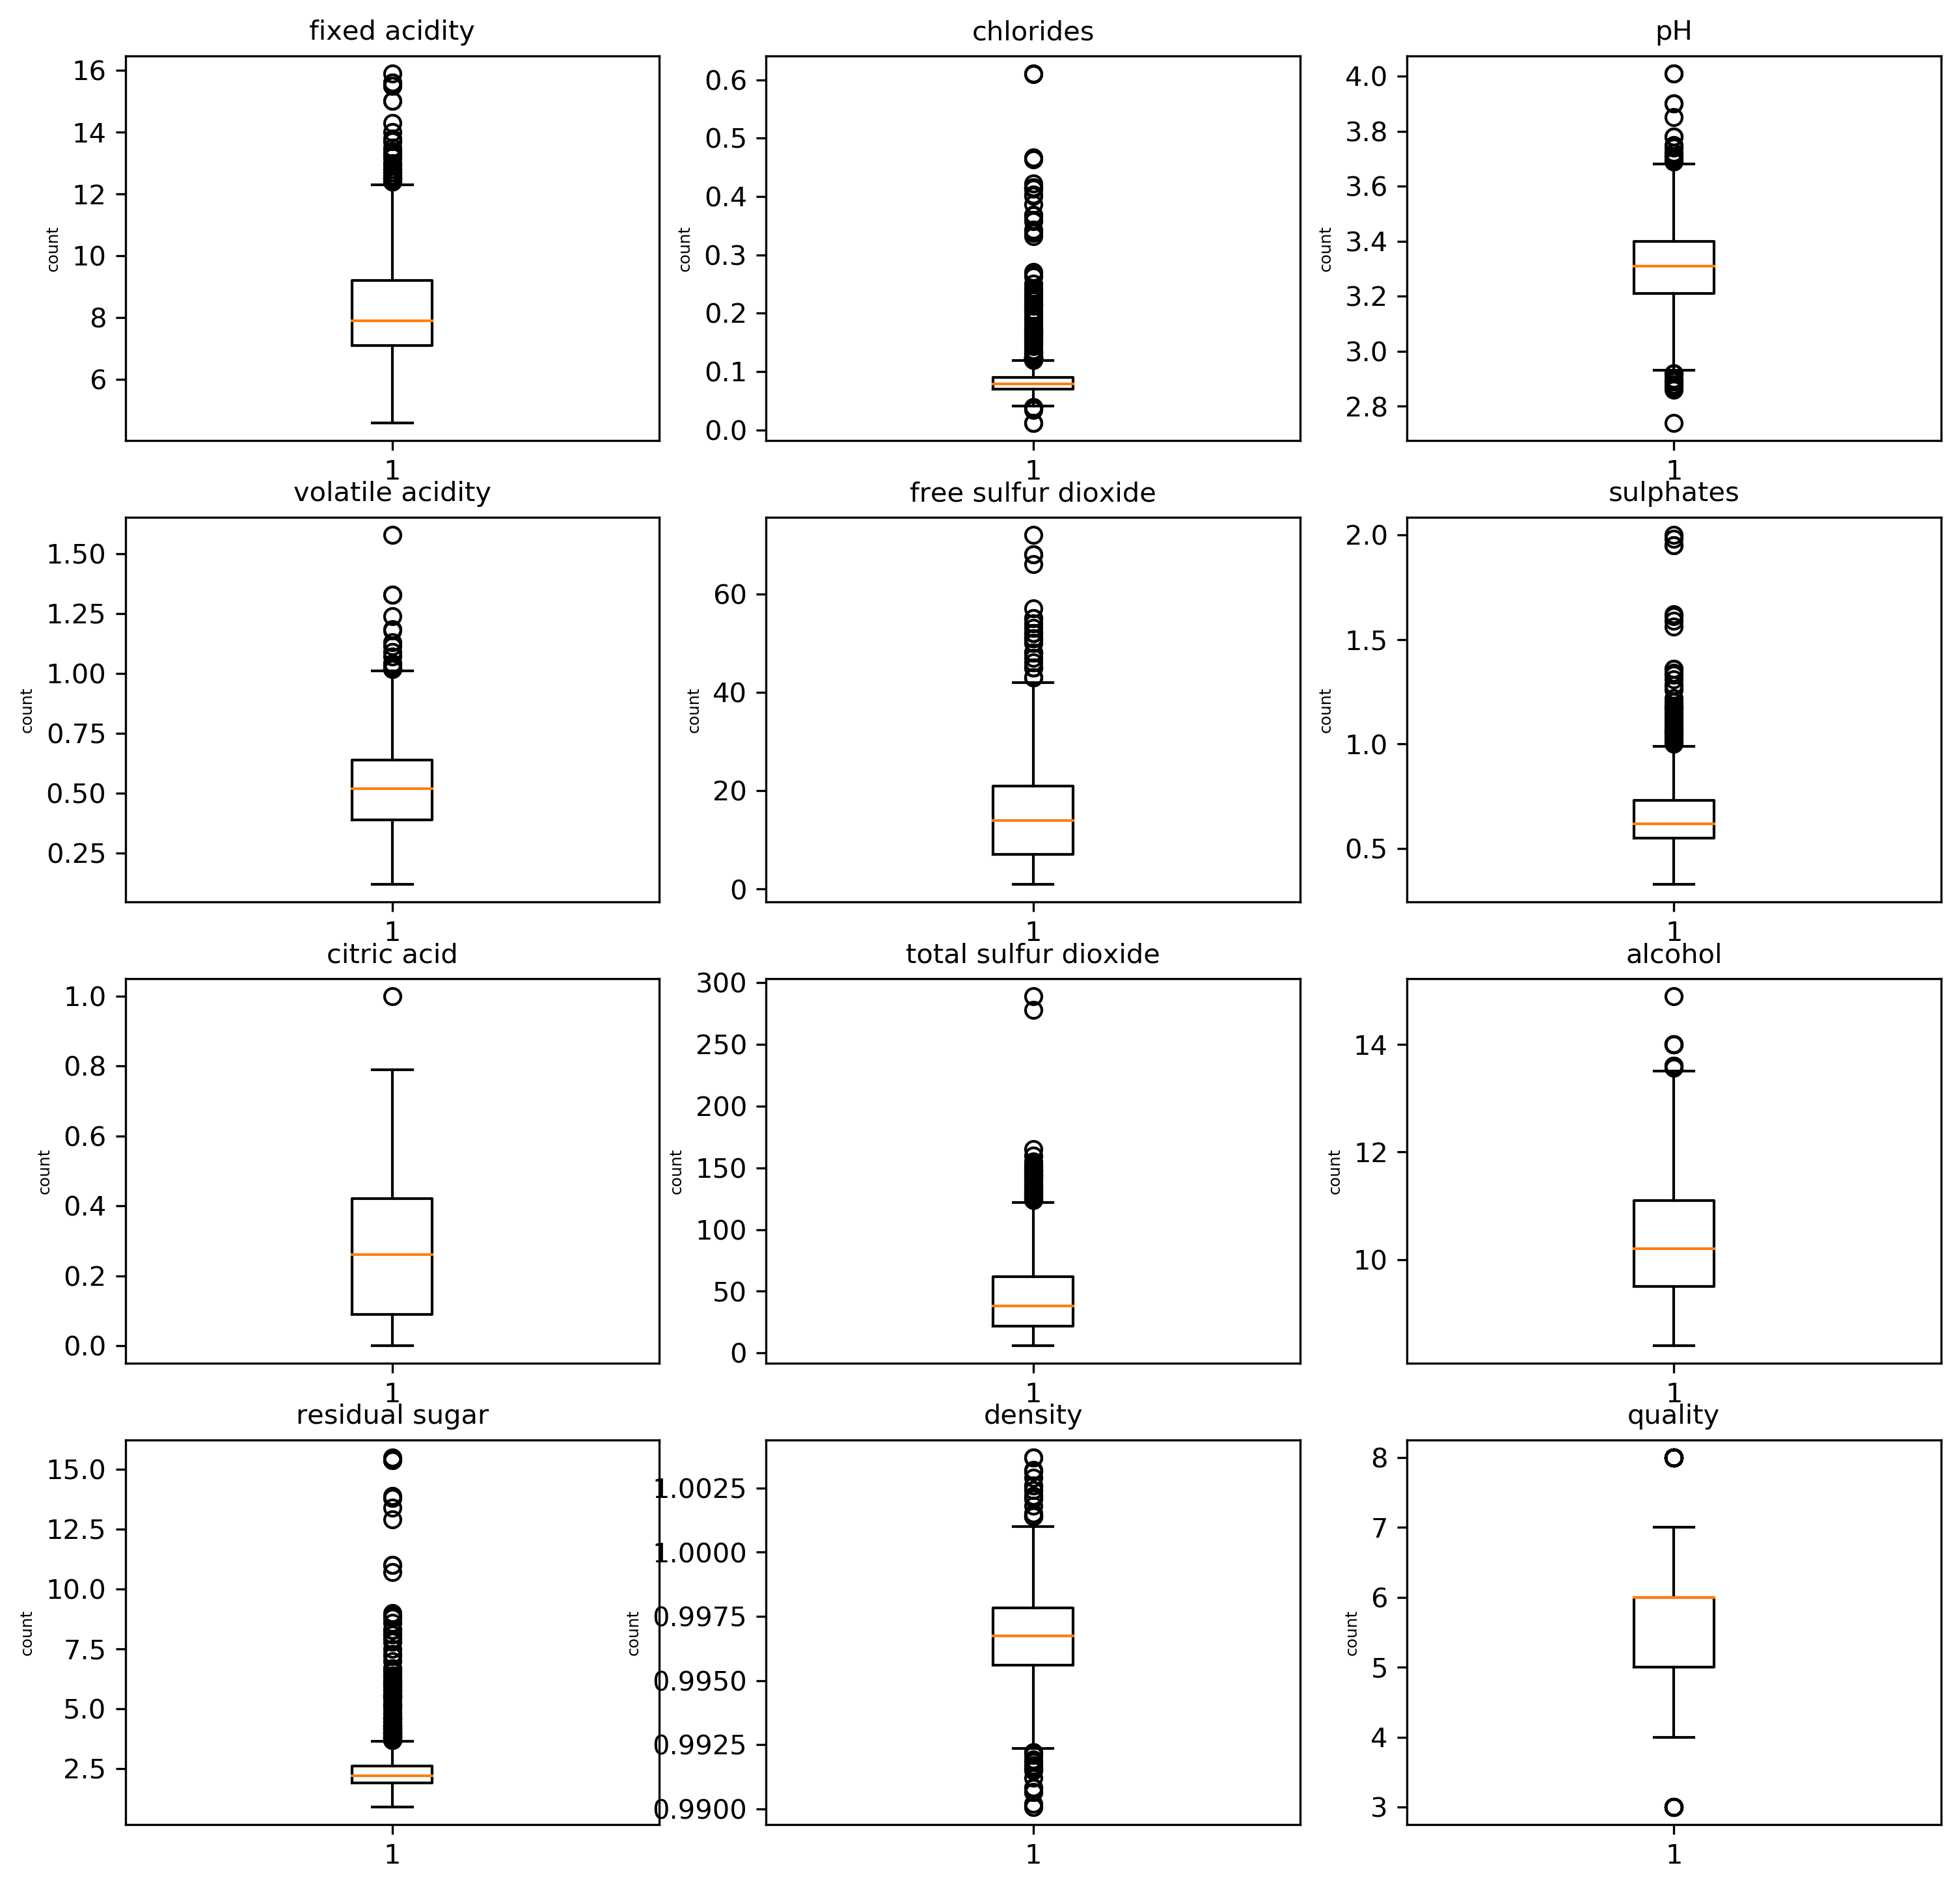

In [13]:
fig = plt.figure()
fig.tight_layout()
fig,axes = plt.subplots(nrows=4,ncols=3,figsize=(12,12),dpi=300)
titles = ['fixed acidity','volatile acidity','citric acid','residual sugar',
          'chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol','quality']
i = -1
j = 0
for title in titles:
    i = i+1
    axes[i][j].set_title(title,fontsize =10)
    axes[i][j].set_ylabel('count',fontsize =6)
    axes[i][j].boxplot(wine[title])
    if(i==3):
        j = j+1
        i = -1


### Splitting the data

In [14]:
wine['quality'] = wine[wine['quality']>6.5]
wine['quality'].unique()

array([ nan,  7.3,  7.8,  8.5,  8.1,  7.5,  8. ,  5.4,  9.6, 12.8, 11. ,
        5.2, 15. , 10. , 11.8,  7.9, 10.3,  8.9,  7.7,  8.7,  9.8, 11.6,
       11.9, 12.5,  6.6, 10.5,  9.4, 11.5,  5.6, 12. ,  9.9,  9.5, 12.6,
       15.6,  5.3, 10.4, 11.3,  9.2, 10.7, 10.2, 13.3, 12.9, 11.1,  5. ,
        9.3,  5.1,  8.2,  8.4,  4.9,  6.7, 10.1,  7.6, 11.7,  9.1,  8.8,
        8.3,  7.4,  6.8,  8.6,  7.2,  6.4,  9. ,  7. ,  7.1, 10.6,  6.2,
        5.5,  6.1])

In [15]:
# X is our feature coloumn and Y is our target coloumn
X = wine.drop('quality', axis = 1).values
y = wine['quality'].values.reshape(-1,1)

In [16]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Preprocessing Data

In [17]:
sc = StandardScaler()
sc.fit(X_train,X_test)
X_train = (X_train*1000)
X_test = (X_test*1000)
X_train = X_train.astype('int64')

In [18]:
data = pd.Series(y_test.ravel())
data.unique()

array([ nan,  9.1,  8.2,  7.1,  7.3,  6.6, 10.4,  7.2,  7.5, 10.3,  9.4,
       12. , 12.6,  9.2,  5.6,  7.4, 10. ,  7.7,  9. ,  6.8, 12.8,  8.5,
        8.8, 11.6,  8.1])

### Applying KNN Classifier

In [19]:
# Calculating number of neighbours'
no_neighbours = (len(X_train))**0.5
no_neighbours

35.76310948449533

In [20]:
knn = KNeighborsClassifier(n_neighbors = 35,p=5)

In [21]:
# Fitting classifier to the Training set
knn.fit(X_train, y_train.ravel())

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
# Predict on the test data: y_pred
y_pred=knn.predict(X_test)

In [ ]:
# Computing the accuracy 
accuracy_knn_test = accuracy_score(y_test, y_pred)
accuracy_knn_test


In [ ]:
plt.scatter(y_test,y_pred)